**Data Source** : https://www.kaggle.com/sajid576/sql-injection-dataset

**The Primary goal of this case study to classify SQL injection attack**

We have 30920 sample data and 1 class label(0/1). The 0 indicates "No SQL injection" found and 1 indicates "SQL Injection Found"

**Import Necessary Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("Modified_SQL_Dataset.csv")

In [ ]:
data.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [ ]:
data.shape

(30919, 2)

In [ ]:
data['Label'].value_counts()

0    19537
1    11382
Name: Label, dtype: int64

We found 19537 number of rows as "NO SQL Injection attack" and 11382 found as SQL injection attack

In [ ]:
data.duplicated().any()

True

In [ ]:
df = data[data.duplicated()]
df

,Query,Label
866,#NAME?,1
13532,#NAME?,0
14626,1.94E+15,0
15635,#NAME?,0
17255,1.86E+15,0
17913,#NAME?,0
18233,#NAME?,0
18875,#NAME?,0
18961,7.75E+15,0
19328,26%,1


Observation :  We found duplicated rows from our dataaset

**let's drop the duplicated entry**

In [ ]:
data.drop_duplicates(inplace=True)
data.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [ ]:
data.shape

(30907, 2)

In [ ]:
data.duplicated().any()

False

Observation : We have removed the all duplicate rows. And Found 30907 number of sample data and 2 features value

**Let' start to find Null value**

In [ ]:
data.isnull().any()

Query    False
Label    False
dtype: bool

Observation : We did not find any rows  have null value.

**Exploratory Data Analysis(EDA)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart of Target Distribution')

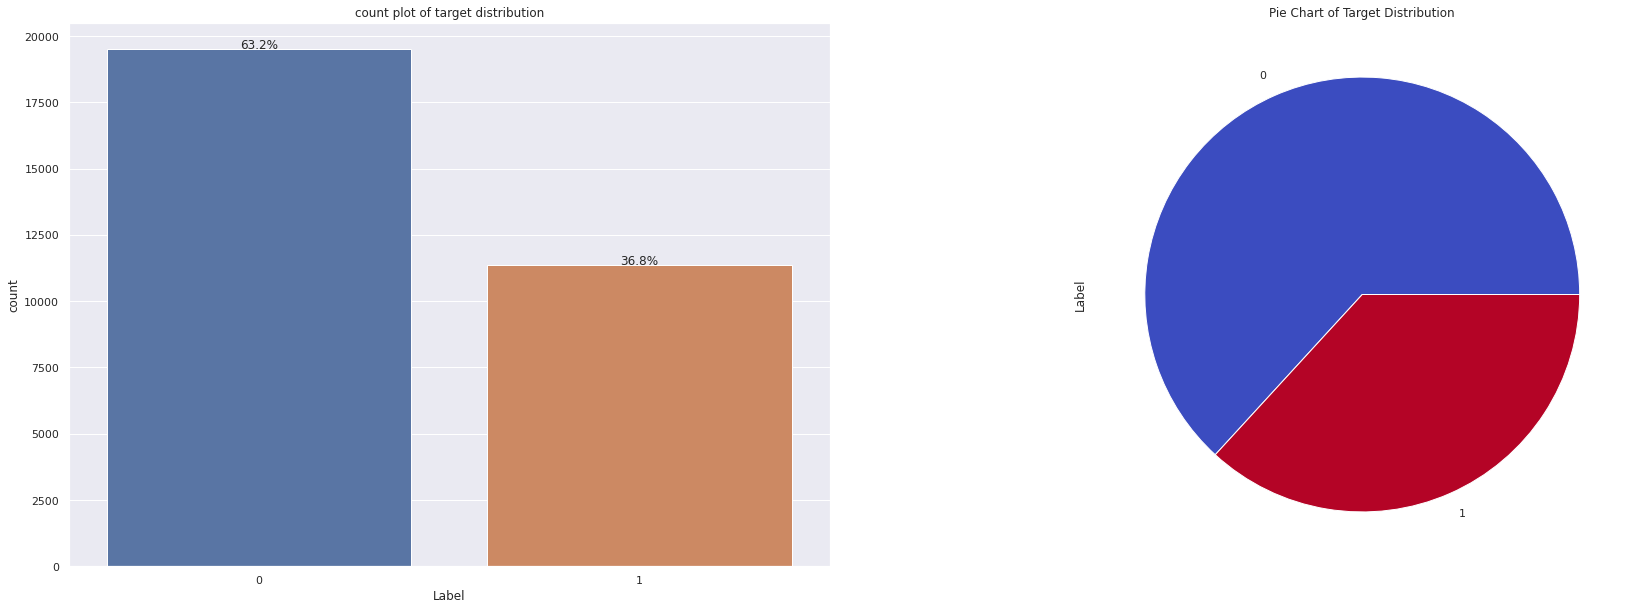

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
plt.subplot(1,2,1)
ax = sns.countplot(data['Label'])
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/len(data)), (p.get_x()+0.35, p.get_height()+1))
ax.set_title('count plot of target distribution')
ax.set_xlabel('Label')
ax.set_ylabel('count')

plt.subplot(1,2,2)
ax = data['Label'].value_counts().plot(kind='pie',colormap='coolwarm')
ax.set_title("Pie Chart of Target Distribution")

Observation : Here, it is clearly said that data points belonging to "No SQL injection" attack is 63.2% and "SQL injection attack" is 36.8%.

**Let's Do Text Preprocessing**

Import Neccesary Libraries

In [ ]:
import re
import nltk
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from nltk.stem.porter import PorterStemmer
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import word2vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [ ]:
#printing some random variable
sent_0 = data['Query'].values[0]
print(sent_0)
print("="*50)

sent_2000 = data['Query'].values[2000]
print(sent_2000)
print("="*50)

sent_15000 = data['Query'].values[15000]
print(sent_15000)
print("="*50)

sent_20000 = data['Query'].values[20000]
print(sent_20000)
print("="*50)

" or pg_sleep  (  __TIME__  )  --
-6073"   )    )     )   or 9502  =  2012#
wilson@autoconstruccion.fi
  SELECT SUBSTR ( "SQL Tutorial", -5, 5 )  AS ExtractString;


In [ ]:
#remove the special Character :  https://stackoverflow.com/a/5843547/4084039
sent_15000 = re.sub('[^A-Za-z0-9]+',' ',sent_15000)
print(sent_15000)


wilson autoconstruccion fi


In [ ]:
sent_20000 = re.sub('[^A-Za-z0-9]+',' ',sent_20000)
print(sent_20000)

 SELECT SUBSTR SQL Tutorial 5 5 AS ExtractString 


In [ ]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [ ]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_query = []
# tqdm is for printing the status bar
for sentance in tqdm(data['Query'].values):
    sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)
    sentance = re.sub(r',', ' ', sentance)
    #https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
    tokenization = nltk.word_tokenize(sentance)
    sentance = ' '.join([lemmatizer.lemmatize(w) for w in tokenization])
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_query.append(sentance.strip())

100%|██████████| 30907/30907 [00:05<00:00, 6061.41it/s]


In [ ]:
preprocessed_query

['pg sleep time',
 'create user name identified pass123 temporary tablespace temp default tablespace user',
 '1 utl inaddr get host address select distinct table name select distinct table name rownum limit sys table limit 5',
 'select user id 1 1 1 union select 1 version 1',
 'select user id 1 1 union select 1 version 1',
 'select name syscolumns id select id sysobjects name tablename',
 'select user id 1 1 1 1',
 '1 load file char 47 101 116 99 47 112 97 115 115 119 100 1 1 1',
 'select user id 1 1 1 union select 1 version 1',
 'select user id 1 union select 1 version 1',
 '1 1',
 '',
 'admin 1 1',
 'select user id 1 1 1 1',
 '1 1',
 '1 utl inaddr get host address select distinct column name select distinct column name rownum limit tab column limit 5',
 'select user id 1 union select 1 version 1',
 'select user id 1 1 1 1',
 'select user id 1 1 1 1',
 'distinct',
 'select user id 1 1 1 1',
 '1 ascii lower substring select top 1 name sysobjects xtype u 1 1 116',
 'select user id 1 1 1

In [ ]:
text = str(preprocessed_query)

**Let's Do the Word Cloud Visualization**

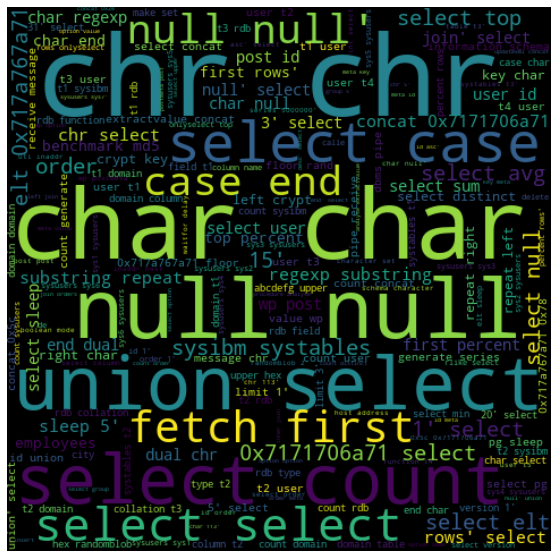

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Observation :  The word Select,Union,Char,Count and Null occurs more frequent

**Featurization**

**BAG OF WORDS**

In [194]:
#BOW
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
count_vect = CountVectorizer()
count_vect.fit_transform(preprocessed_query)
print("Some Feature Names",count_vect.get_feature_names_out()[:10])


Some Feature Names ['00' '000001' '000003' '000004' '000023' '000045' '00033926r' '00041731d'
 '00207473j' '00217e']


**Bi-Grams and n-Grams**

In [ ]:
#Bi-gram
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
final_bigram_counts = count_vect.fit_transform(preprocessed_query)
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())


the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (30907, 2930)


**TF-IDF Vectorizer**

In [195]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2),min_df=10)
tf_idf_vect.fit_transform(preprocessed_query)

print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names_out()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_query)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())


some sample features(unique words in the corpus) ['01' '01 1996' '06' '06 15' '07' '07 01' '07 31' '09' '09 34' '0x28']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (30907, 2930)


**TF-IDF Weighted Word2Vec**

In [186]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in preprocessed_query:
    list_of_sentance.append(sentance.split())

In [187]:
from gensim.models import Word2Vec
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50,workers=4)

In [188]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  3729
sample words  ['pg', 'sleep', 'time', 'create', 'user', 'name', 'temp', '1', 'utl', 'inaddr', 'get', 'host', 'address', 'select', 'distinct', 'table', 'rownum', 'limit', 'sys', '5', 'id', 'union', 'version', 'load', 'file', 'char', '47', '101', '116', '99', '112', '97', '119', '100', 'admin', 'column', 'tab', 'ascii', 'lower', 'substring', 'top', 'u', 'insert', 'password', '8', '27', 'null', 'banner', 'v', '2']


In [190]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 30907/30907 [00:07<00:00, 4039.76it/s]

30907
50


In [191]:
model = TfidfVectorizer()
model.fit(preprocessed_query)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names_out(), list(model.idf_)))

In [193]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names_out() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentance is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence
    for word in sent: # for each word in a sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 30907/30907 [02:23<00:00, 214.84it/s]
